In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:

def mag2A(mags, author, models):
    b,c = models[author]
    A = [10**(b*m-c) for m in mags]
    return A


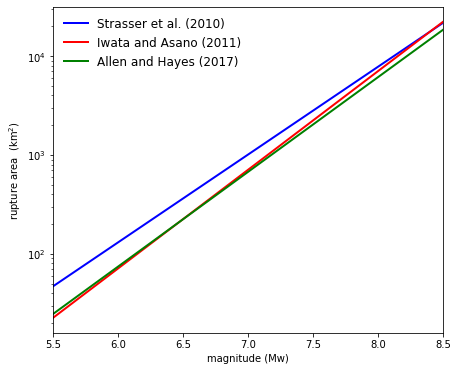

In [6]:
models = {'Strasser et al. (2010)': [0.89,3.225],
        'Iwata and Asano (2011)': [1.0, 4.149],
        'Allen and Hayes (2017)': [0.96,3.890],}

mags = [m for m in np.arange(5.5, 8.6, 0.1)]

fig, ax = plt.subplots(figsize=(7,6))
plt.rcParams.update({'font.size': 12})

plotcol = ['b','r', 'g']
for author, pcol in zip(models.keys(), plotcol):
    A = mag2A(mags, author, models)
    ax.semilogy(mags, A, '-', label= author, color= pcol, linewidth=2)
ax.legend(frameon=False)
ax.set_xlim([5.5, 8.5])
ax.set_xlabel('magnitude (Mw)')
ax.set_ylabel('rupture area  (km$^2$)');

In [16]:
import csv

fname = 'earthquake_source_table.csv'

mag, L, W = [],[],[]

with open(fname, 'r') as f:
    csvreader = csv.reader(f)
    header = next(csvreader)
    #'mag', 'tect_class', 'f_length', 'f_width'
    mag_index = header.index('mag')
    tectclass_index = header.index('tect_class')
    L_index = header.index('f_length')
    W_index = header.index('f_width')
     # print(L_index, W_index)
    for row in csvreader:
        if row[tectclass_index].lower() =='slab':
            mag.append(float(row[mag_index]))
            L.append(float(row[L_index]))
            W.append(float(row[W_index]))
A_gm = []
for w,l in zip(W,L):
    A_gm.append(w*l)

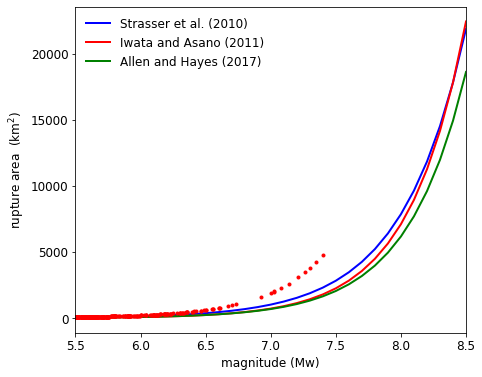

In [19]:
models = {'Strasser et al. (2010)': [0.89,3.225],
        'Iwata and Asano (2011)': [1.0, 4.149],
        'Allen and Hayes (2017)': [0.96,3.890],}

mags = [m for m in np.arange(5.5, 8.6, 0.1)]

fig, ax = plt.subplots(figsize=(7,6))
plt.rcParams.update({'font.size': 12})

plotcol = ['b','r', 'g']
for author, pcol in zip(models.keys(), plotcol):
    A = mag2A(mags, author, models)
    ax.plot(mags, A, '-', label= author, color= pcol, linewidth=2)
ax.plot(mag, A_gm, 'r.');
ax.legend(frameon=False)
ax.set_xlim([5.5, 8.5])
ax.set_xlabel('magnitude (Mw)')
ax.set_ylabel('rupture area  (km$^2$)');